In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import requests

In [13]:
#ACTIVITY 7

#Create a request to get the HTML from the live website
r = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
r.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by GDP (nominal) - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"96ed47bb-894b-4da1-b20d-225a54d425f2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":980815822,"wgRevisionId":980815822,"wgArticleId":380845,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","Wikipedia indefinitely semi-protected pages","Articles with 

In [87]:
#Use beautiful soup to load the text correctly as HTML
soup = BeautifulSoup(r.text)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by GDP (nominal) - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"96ed47bb-894b-4da1-b20d-225a54d425f2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":980815822,"wgRevisionId":980815822,"wgArticleId":380845,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","Wikipedia indefinitely semi-protected pages","Articles with short 

In [25]:
#Find all tables and find the number of the tables
tables = soup.find_all("table")
print("There are {} table(s) in the soup variable".format(len(tables)))

There are 14 table(s) in the soup variable


In [27]:
#Find the correct table and verify the data type of the table
data = soup.find("table", {"class": "wikitable"})
print(type(data))

<class 'bs4.element.Tag'>


In [73]:
#Separate the source, source names, and headers
#Get source
source = data.tbody.find_all('tr',recursive=False)[0]
sourceList = [td for td in source.find_all('td')]
print(len(sourceList))

#Get tables
dataTable = data.tbody.find_all('tr', recursive=False)[1].find_all('td', recursive=False)
dataTableList = []
for td in dataTable:
    dataTableList.append(td.find_all('table'))
print(len(dataTableList))
#print(dataTableList[0][0])

#Get source names
sourceNames = [source.find_all('a')[0].getText() for source in sourceList]
print(sourceNames)

#Get header names
headers1 = []
for tx in dataTableList[0][0].find_all('th'):
    headers1.append(tx.getText().strip())
print(headers1)

3
3
['International Monetary Fund', 'World Bank', 'United Nations']
['Rank', 'Country/Territory', 'GDP(US$million)']


In [74]:
#Get the table data

rows1 = dataTableList[0][0].find_all('tbody')[0].find_all('tr')[1:]
data_rows1 = [[td.getText().strip() for td in tr.find_all('td')] for tr in rows1]
data_rows1

[['', 'World[19]', '87,265,226'],
 ['1', 'United States', '21,439,453'],
 ['—', 'European Union[22][n 1]', '18,705,132'],
 ['2', 'China[n 2]', '14,140,163'],
 ['3', 'Japan', '5,154,475'],
 ['4', 'Germany', '3,863,344'],
 ['5', 'India', '2,935,570'],
 ['6', 'United Kingdom', '2,743,586'],
 ['7', 'France', '2,707,074'],
 ['8', 'Italy', '1,988,636'],
 ['9', 'Brazil', '1,847,020'],
 ['10', 'Canada', '1,730,914'],
 ['11', 'Russia[n 3]', '1,637,892'],
 ['12', 'South Korea', '1,629,532'],
 ['13', 'Spain', '1,397,870'],
 ['14', 'Australia', '1,376,255'],
 ['15', 'Mexico', '1,274,175'],
 ['16', 'Indonesia', '1,111,713'],
 ['17', 'Netherlands', '902,355'],
 ['18', 'Saudi Arabia', '779,289'],
 ['19', 'Turkey', '743,708'],
 ['20', 'Switzerland', '715,360'],
 ['—', 'Taiwan', '586,104'],
 ['21', 'Poland', '565,854'],
 ['22', 'Thailand', '529,177'],
 ['23', 'Sweden', '528,929'],
 ['24', 'Belgium', '517,609'],
 ['25', 'Iran', '458,500'],
 ['26', 'Austria', '447,718'],
 ['27', 'Nigeria', '446,543'],
 [

In [75]:
#Create a df for this table
df1 = pd.DataFrame(data_rows1, columns=headers1)
df1.head()

,Rank,Country/Territory,GDP(US$million)
0,,World[19],"87,265,226"
1,1,United States,"21,439,453"
2,—,European Union[22][n 1],"18,705,132"
3,2,China[n 2],"14,140,163"
4,3,Japan,"5,154,475"


In [79]:
#Redo these steps for the other two tables
#Get headers
headers2 = []
for tx in dataTableList[1][0].find_all('th'):
    headers2.append(tx.getText().strip())

#Get data
rows2 = dataTableList[1][0].find_all('tbody')[0].find_all('tr')[1:]

In [80]:
#Create function that consistently pulls the correct text from a table data definition
def find_right_text(i, td):
    if i==0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [81]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.find_all('td'))] for tr in rows2]
data_rows2

[['', 'World', '87,751,541'],
 ['1', 'United States', '21,427,700'],
 ['2', 'China[n 5]', '14,342,903'],
 ['3', 'Japan', '5,081,770'],
 ['4', 'Germany', '3,845,630'],
 ['5', 'India', '2,875,142'],
 ['6', 'United Kingdom', '2,827,113'],
 ['7', 'France', '2,715,518'],
 ['8', 'Italy', '2,001,244'],
 ['9', 'Brazil', '1,839,758'],
 ['10', 'Canada', '1,736,426'],
 ['11', 'Russia[n 3]', '1,699,877'],
 ['12', 'Korea, South', '1,642,383'],
 ['13', 'Spain', '1,394,116'],
 ['14', 'Australia', '1,392,681'],
 ['15', 'Mexico', '1,258,287'],
 ['16', 'Indonesia', '1,119,191'],
 ['17', 'Netherlands', '909,070'],
 ['18', 'Saudi Arabia', '792,967'],
 ['19', 'Turkey', '754,412'],
 ['20', 'Switzerland', '703,082'],
 ['21', 'Poland', '592,164'],
 ['—', 'Taiwan (2017)', '574,905'],
 ['22', 'Thailand', '543,650'],
 ['23', 'Sweden', '530,833'],
 ['24', 'Belgium', '529,607'],
 ['25', 'Argentina', '449,663'],
 ['26', 'Nigeria', '448,120'],
 ['27', 'Austria', '446,315'],
 ['28', 'Iran (2017)', '445,345'],
 ['29',

In [82]:
#Create df for table 2
df2 = pd.DataFrame(data_rows2, columns=headers2)
df2.head()

,Rank,Country/Territory,GDP(US$million)
0,,World,"87,751,541"
1,1,United States,"21,427,700"
2,2,China[n 5],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,845,630"


In [86]:
#Repeat for table 3
#Get headers
headers3 = []
for tx in dataTableList[2][0].find_all('th'):
    headers3.append(tx.getText().strip())

#Get rows
rows3 = dataTableList[2][0].find_all('tbody')[0].find_all('tr')[1:]

#Get data from rows
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.find_all('td'))] for tr in rows3]

#Create a df for table 3
df3 = pd.DataFrame(data_rows3, columns=headers3)
df3.head()

,Rank,Country/Territory,GDP(US$million)
0,,World[24],"85,085,189"
1,1,United States,"20,580,223"
2,2,China[n 5],"13,608,152"
3,3,Japan,"4,971,323"
4,4,Germany,"3,949,549"


In [7]:
#ACTIVITY 8

#Bring in the visit data
visit_data = pd.read_csv("visit_data.csv")
visit_data.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [9]:
#Check for duplicate entries
print("Are there duplicates in the first name field? : {}". format(any(visit_data.first_name.duplicated())))
print("Are there duplicates in the last name field? : {}". format(any(visit_data.last_name.duplicated())))
print("Are there duplicates in the email field? : {}". format(any(visit_data.email.duplicated())))

Are there duplicates in the first name field? : True
Are there duplicates in the last name field? : True
Are there duplicates in the email field? : False


In [14]:
#Check if any columns have an NaN value
print("Are there NaN values in the first name field? : {}". format(visit_data.first_name.isnull().values.any()))
print("Are there NaN values in the last name field? : {}". format(visit_data.last_name.isnull().values.any()))
print("Are there NaN values in the email field? : {}". format(visit_data.email.isnull().values.any()))
print("Are there NaN values in the ip_address field? : {}". format(visit_data.ip_address.isnull().values.any()))
print("Are there NaN values in the visit field? : {}". format(visit_data.visit.isnull().values.any()))

Are there NaN values in the first name field? : True
Are there NaN values in the last name field? : True
Are there NaN values in the email field? : False
Are there NaN values in the ip_address field? : False
Are there NaN values in the visit field? : True


In [17]:
#Get rid of the outliers

#Set original size of dataset to compare it to the cleansed dataset
originalSize = visit_data.shape

df = visit_data[np.isfinite(visit_data['visit'])]
newDFsize = df.shape
print(originalSize, newDFsize)
#Shows that 26 rows were removed

(1000, 7) (974, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e44af3ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e44af53190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e44af3b730>],
 'medians': [<matplotlib.lines.Line2D at 0x1e44af53850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e44af53b50>],
 'means': []}

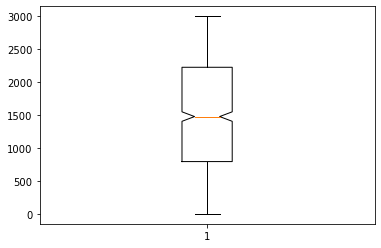

In [18]:
#Create box plot to check for outliers
plt.boxplot(df.visit, notch=True)

In [23]:
#Remove those values that are defined as outliers from the boxplot (> 2900, < 100)
cleanDf = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]
print(cleanDf.shape)
#After removing outliers we have 923 rows in the dataset

(923, 7)


In [24]:
#Question 3

#Insert data into an sql lite database
import sqlite3

In [25]:
#Write an SQL query that will be used to create our table
query = '''
CREATE TABLE contact_info
(Name VARCHAR(30),
Address VARCHAR(50),
City VARCHAR(30),
State VARCHAR(20),
Zip VARCHAR(20),
Phone_Number VARCHAR(11)
);'''

#Create a connection with an SQLite database
con = sqlite3.connect("contact_info.sqlite")

#Execute the query on the database that we have created a connection with
con.execute(query)

In [26]:
#Create data to insert into the database
data = [
    ("Cody Myers", "123 east street", "Detroit", "Mi", "48939", "3132341234"),
    ("Some Person", "321 east street", "Detroit", "Mi", "48939", "3130989876"),
    ("Person Some", "432 west street", "Detroit", "Mi", "48940", "3138751594"),
    ("Another Person", "546 north street", "Detroit", "Mi", "48948", "8451564894"),
    ("Different Person", "48 weast street", "Troy", "Mi", "48485", "6514891452"),
    ("A Person", "422 north street", "Park Place", "Ma", "48939", "5481261584"),
    ("This Person", "98 weast street", "Aplace", "Ca", "90845", "5689541584"),
    ("Some Human", "584 this road", "Chicago", "Il", "47451", "3154836524"),
    ("A Dog", "34 Good Dog Lane", "Acity", "Wi", "48759", "382651594"),
    ("A Cat", "76 The Cat Lane", "ANeighborhood", "Mi", "48874", "3185263695"),
]

#Create query for adding the data to the database
addDataQuery = '''
INSERT INTO contact_info
VALUES(?, ?, ?, ?, ? ,?)'''

#Add data to database
con.executemany(addDataQuery, data)

In [28]:
#Query the table to get the records that you just put into the table

selectQuery = '''
SELECT * FROM contact_info'''

cursor = con.execute(selectQuery)
queriedData = cursor.fetchall()
queriedData

[('Cody Myers', '123 east street', 'Detroit', 'Mi', '48939', '3132341234'),
 ('Some Person', '321 east street', 'Detroit', 'Mi', '48939', '3130989876'),
 ('Person Some', '432 west street', 'Detroit', 'Mi', '48940', '3138751594'),
 ('Another Person',
  '546 north street',
  'Detroit',
  'Mi',
  '48948',
  '8451564894'),
 ('Different Person', '48 weast street', 'Troy', 'Mi', '48485', '6514891452'),
 ('A Person', '422 north street', 'Park Place', 'Ma', '48939', '5481261584'),
 ('This Person', '98 weast street', 'Aplace', 'Ca', '90845', '5689541584'),
 ('Some Human', '584 this road', 'Chicago', 'Il', '47451', '3154836524'),
 ('A Dog', '34 Good Dog Lane', 'Acity', 'Wi', '48759', '382651594'),
 ('A Cat', '76 The Cat Lane', 'ANeighborhood', 'Mi', '48874', '3185263695')]